<a href="https://colab.research.google.com/github/AyresNishio/Metodos_Numericos_Python/blob/master/MMQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# //programa de ajuste polinomial pelo Método dos Mínimos Quadrados Ponderados
# Exemplo 7.2)
x = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]);
y = np.array([3.0, 2.6, 4.9, 5.3, 7.0, 7.5, 7.8, 7.6, 9.5, 9.0, 9.5,10.5,10.0, 8.5, 8.3, 9.2, 8.7]);

In [16]:
# Grau do polinômio a ser ajustado aos dados
grau= 2;

## Mínimos Quadrados Linear

In [17]:
def MMQ_linear(x,y,grau):

    #Número Total de Pontos da Amostra
    n_pontos=len(x);
    print('Número de pontos:')
    print(n_pontos)

    # Soma dos valores de x e de suas potências
    x_soma=np.zeros(2*grau, dtype = np.float64)
    for i in range(2*grau):
        x_soma[i]=sum(l**(i+1) for l in x)  

    # //Formação da matriz A e do vetor b do sistema linear Ax=b, cuja solução
    # // corresponde aos coeficientes do polinômio a ser ajustado
    # //Primeira linha da matriz A e do vetor b
    A=np.zeros((grau+1,grau+1), dtype = np.float64)
    b=np.zeros(grau+1, dtype = np.float64)
    A[0,0]=n_pontos
    b[0]=sum(y)
    for k in range(1,grau+1):
        A[0,k] = x_soma[k-1]

        # //Demais linhas de A
    for i in range(1,grau+1):
        for j in range(grau+1):
            A[i,j]=x_soma[i+j-1]

    # //Formação do vetor b
    for i in range(1,grau+1):
        for j in range(n_pontos):
            b[i] += y[j]*(x[j]**i) 

    # //Determinação dos coeficientes do polinômio
    # alfa=A\b
    alfa = np.linalg.inv(A)@np.transpose(b)
    
    # POlinônio Interpolante
    y_ajuste = np.zeros(n_pontos,dtype=np.float64)
    for i in range(n_pontos):
        for j in range(grau+1):
            y_ajuste[i] = y_ajuste[i] + alfa[j]*x[i]**j

    print("Matriz A")        
    print(A) 

    print("Matriz b")        
    print(b) 

    print("Parametros da Função de Ajuste")        
    print(alfa) 

    return(y_ajuste)

In [18]:
y_ajuste=MMQ_linear(x,y,grau)

Número de pontos:
17
Matriz A
[[   17.     68.    374. ]
 [   68.    374.   2312. ]
 [  374.   2312.  15240.5]]
Matriz b
[ 128.9   592.6  3345.15]
Parametros da Função de Ajuste
[ 2.36150671  2.51589267 -0.22012384]


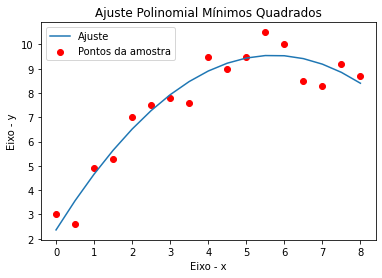

In [19]:
    #Gráfico 
    #Pontos de entrada
    plt.scatter(x, y, marker = 'o',label = 'Pontos da amostra', color = 'red')
    plt.plot(x, y_ajuste, label = 'Ajuste')

    
    # Nome dos Eixos
    plt.xlabel('Eixo - x')
    plt.ylabel('Eixo - y')
    
    # Título do Gráfico
    plt.title('Ajuste Polinomial Mínimos Quadrados')
    
    # Cria janela com Gráfico
    plt.legend()
    plt.show()

##Mínimos Quadrados Não Linear

In [24]:
# //definição das funções que compõem o ajuste
def func1(x):
    y=np.log(x)
    return y

def func2(x):
    y=np.cos(x)
    return y

def func3(x):
    y=np.e**x
    return y

#Vetor de Funções
funcs = [func1, func2, func3]

In [21]:
#Exemplo 7.3
x = np.array([0.25,0.65,0.95,1.25,1.75,2.00,2.25,2.55,2.75,3.05]);
y = np.array([0.20,-.25,-1.1,-.45,0.25,0.10,-.30,0.25,0.55,1.05]);

In [22]:
def MMQ_n_linear(x,y,funcs):
  #Número total de pontos da amostra
    n_pontos=len(x)

    # Número de funções que compõem o ajuste
    n_funcoes=len(funcs);

    #Construção da Matriz A
    A=np.zeros([n_funcoes,n_funcoes],np.float64)

    #-Matriz contendo o resultado de cada função em cada ponto
    x_funcs = np.zeros([n_funcoes,n_pontos],np.float64)
    for f in range(n_funcoes):
        for i in range(n_pontos):
            x_funcs[f,i] = funcs[f](x[i])
    #-Constroi A com os resultados das funções
    for i in range(n_funcoes):
        for j in range(n_funcoes):
            soma = 0.0
            for k in range(n_pontos):
                soma = soma + x_funcs[i,k]*x_funcs[j,k]
            A[i,j] = soma
          

    #Construção do Vetor b
    b=np.zeros(n_funcoes,dtype = np.float64)
    for i in range(n_funcoes):
        for j in range(n_pontos):
            b[i] += y[j]*x_funcs[i,j]

    #Coeficientes da função de ajuste    
    alfa = np.linalg.inv(A)@np.transpose(b)

    ajuste = np.zeros(n_pontos,dtype=np.float64)
    for i in range(n_pontos):
        for j in range(n_funcoes):
            ajuste[i] = ajuste[i] +  alfa[j]*funcs[j](x[i])

     
    print("Matriz A")        
    print(A) 

    print("Matriz b")        
    print(b) 

    print("Parametros da Função de Ajuste")        
    print(alfa) 

    return ajuste

In [25]:
y_ajuste=MMQ_n_linear(x,y,funcs)

Matriz A
[[   6.75418863   -5.36571671   65.43630433]
 [  -5.36571671    5.14483403  -50.80286636]
 [  65.43630433  -50.80286636 1056.48874928]]
Matriz b
[ 1.71368699 -2.44618747 28.67055557]
Parametros da Função de Ajuste
[-1.06855265 -1.27271832  0.03212051]


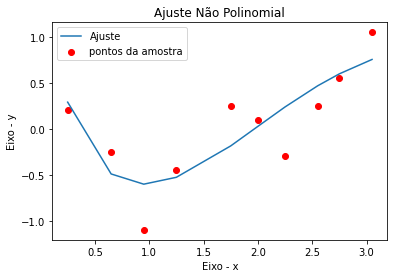

In [28]:
#Gráfico 
#Pontos de entrada
plt.scatter(x, y, marker = 'o',label = 'pontos da amostra', color = 'red')
plt.plot(x, y_ajuste, label = 'Ajuste')


# Nome dos Eixos
plt.xlabel('Eixo - x')
plt.ylabel('Eixo - y')
# Título do Gráfico
plt.title('Ajuste Não Polinomial')

# Cria janela com Gráfico
plt.legend()
plt.show()